# FINAL EXAM CPSC 4830

Student name: Phan Hoang An Nguyen

Student ID: 100404103

Date: 2024 Aug 12

# Task 1

In [1]:
# import libraries
import pandas as pd
import numpy as np

d:\Anaconda\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
import sqlite3

# Example schema definition
create_table_query = """
CREATE TABLE fraud_data (
    trans_date_trans_time TEXT,
    merchant TEXT,
    category TEXT,
    amt REAL,
    city TEXT,
    state TEXT,
    lat REAL,
    long REAL,
    city_pop INTEGER,
    job TEXT,
    dob TEXT,
    trans_num TEXT PRIMARY KEY,
    merch_lat REAL,
    merch_long REAL,
    is_fraud INTEGER
);
"""


In [3]:
# Connect to SQLite (file-based)
conn = sqlite3.connect('fraud_data.db')
# Execute the create table query
cursor = conn.cursor()
cursor.execute(create_table_query)
conn.commit()

In [4]:
# Load the CSV file into a DataFrame
csv_file_path = 'fraud_data.csv'
df = pd.read_csv(csv_file_path)

In [5]:
# Check the schema
schema_result = pd.read_sql("PRAGMA table_info(fraud_data);", conn)
print(schema_result)

    cid                   name     type  notnull dflt_value  pk
0     0  trans_date_trans_time     TEXT        0       None   0
1     1               merchant     TEXT        0       None   0
2     2               category     TEXT        0       None   0
3     3                    amt     REAL        0       None   0
4     4                   city     TEXT        0       None   0
5     5                  state     TEXT        0       None   0
6     6                    lat     REAL        0       None   0
7     7                   long     REAL        0       None   0
8     8               city_pop  INTEGER        0       None   0
9     9                    job     TEXT        0       None   0
10   10                    dob     TEXT        0       None   0
11   11              trans_num     TEXT        0       None   1
12   12              merch_lat     REAL        0       None   0
13   13             merch_long     REAL        0       None   0
14   14               is_fraud  INTEGER 

In [6]:
# Remove duplicates based on the 'trans_num' column
df.drop_duplicates(subset=['trans_num'], inplace=True)
# Insert data into the SQLite table
df.to_sql('fraud_data', conn, if_exists='append', index=False)

14383

In [7]:
# Verify the data types and content by fetching the first few rows
query_result = pd.read_sql("SELECT * FROM fraud_data LIMIT 5;", conn)
print(query_result)  # Display data

  trans_date_trans_time                          merchant        category  \
0      04-01-2019 00:58  "Stokes, Christiansen and Sipes"     grocery_net   
1      04-01-2019 15:06                      Predovic Inc    shopping_net   
2      04-01-2019 22:37                   Wisozk and Sons        misc_pos   
3      04-01-2019 23:06                    Murray-Smitham     grocery_pos   
4      04-01-2019 23:59                        Friesen Lt  health_fitness   

      amt   city state      lat      long  city_pop  \
0   14.37  Wales    AK  64.7556 -165.6723       145   
1  966.11  Wales    AK  64.7556 -165.6723       145   
2   49.61  Wales    AK  64.7556 -165.6723       145   
3  295.26  Wales    AK  64.7556 -165.6723       145   
4   18.17  Wales    AK  64.7556 -165.6723       145   

                          job         dob                         trans_num  \
0  "Administrator, education"  09-11-1939  a3806e984cec6ac0096d8184c64ad3a1   
1  "Administrator, education"  09-11-1939  a5918

In [8]:
# Query to check the table schema
schema_result = pd.read_sql("PRAGMA table_info(fraud_data);", conn)
print(schema_result)

    cid                   name     type  notnull dflt_value  pk
0     0  trans_date_trans_time     TEXT        0       None   0
1     1               merchant     TEXT        0       None   0
2     2               category     TEXT        0       None   0
3     3                    amt     REAL        0       None   0
4     4                   city     TEXT        0       None   0
5     5                  state     TEXT        0       None   0
6     6                    lat     REAL        0       None   0
7     7                   long     REAL        0       None   0
8     8               city_pop  INTEGER        0       None   0
9     9                    job     TEXT        0       None   0
10   10                    dob     TEXT        0       None   0
11   11              trans_num     TEXT        0       None   1
12   12              merch_lat     REAL        0       None   0
13   13             merch_long     REAL        0       None   0
14   14               is_fraud  INTEGER 

In [9]:
# import api-key
import config
from config import api_key

In [10]:
# import OpenAI
from openai import OpenAI

In [11]:
# Load API-key
client = OpenAI(api_key=api_key)

**Option 1: Use Langchain to get SQL query**

In [12]:
!pip install langchain-community
!pip install tiktoken
!pip install vectorstore
!pip install langchain-openai
!pip install faiss-cpu

In [13]:
from langchain.document_loaders import WebBaseLoader
from langchain.text_splitter import RecursiveCharacterTextSplitter
from langchain.embeddings import OpenAIEmbeddings
from langchain.vectorstores import FAISS
from langchain.memory import ConversationBufferMemory
from langchain.llms import OpenAI
from langchain.chains import ConversationalRetrievalChain
from langchain_openai import OpenAI, OpenAIEmbeddings

USER_AGENT environment variable not set, consider setting it to identify your requests.


**Loading the CSV File and Asking Questions to obtain SQL query code**

In [14]:
from langchain_community.document_loaders.csv_loader import CSVLoader
loader = CSVLoader(file_path="fraud_data.csv")

In [15]:
from langchain_community.document_loaders.csv_loader import CSVLoader
loader = CSVLoader(file_path="fraud_data.csv")
raw_documents = loader.load()
text_splitter = RecursiveCharacterTextSplitter()
documents = text_splitter.split_documents(raw_documents)
embeddings = OpenAIEmbeddings(openai_api_key = config.api_key)
vectorstore = FAISS.from_documents(documents, embeddings)
memory = ConversationBufferMemory(memory_key = "chat_history", return_messages=True)
qa = ConversationalRetrievalChain.from_llm(OpenAI(openai_api_key=config.api_key, temperature=0.2), vectorstore.as_retriever(), memory=memory)

In [16]:
# Obtain SQL query from langchain
query = "filter the fraud records in the year 2019 and give me the SQL query with the table name as fraud_data"
result = qa({"question": query})
result["answer"]

d:\Anaconda\Lib\site-packages\langchain_core\_api\deprecation.py:139: LangChainDeprecationWarning: The method `Chain.__call__` was deprecated in langchain 0.1.0 and will be removed in 0.3.0. Use invoke instead.
  warn_deprecated(


" SELECT * FROM fraud_data WHERE trans_date_trans_time LIKE '%2019%' AND is_fraud = 1;"

In [37]:
# Check and read the query result
query_result = pd.read_sql("SELECT * FROM fraud_data WHERE trans_date_trans_time LIKE '%2019%' AND is_fraud = 1;", conn)
print(query_result)  # Display data

    trans_date_trans_time                                merchant  \
0        04-01-2019 00:58        "Stokes, Christiansen and Sipes"   
1        04-01-2019 15:06                            Predovic Inc   
2        04-01-2019 22:37                         Wisozk and Sons   
3        04-01-2019 23:06                          Murray-Smitham   
4        04-01-2019 23:59                              Friesen Lt   
..                    ...                                     ...   
973      31-12-2019 22:11          "Tillman, Fritsch and Schmitt"   
974      31-12-2019 22:15             "Little, Gutmann and Lynch"   
975      31-12-2019 22:17                           Lemke-Gutmann   
976      31-12-2019 22:17  "Romaguera, Cruickshank and Greenholt"   
977      31-12-2019 22:57            "Towne, Greenholt and Koepp"   

           category      amt           city state      lat      long  \
0       grocery_net    14.37          Wales    AK  64.7556 -165.6723   
1      shopping_net   966.1

- Langchain gives very good results. The only weakness in this case is the user need to add "and give me the SQL query with the table name as fraud_data" after the query request in natural language

**Option 2: Using GPT API to obtain SQL query**

In [18]:
# Function for GPT API
def generate_sql_query(question):
  schema_info = """
    Table Name: fraud_data
    Columns: 
    - trans_date_trans_time (TEXT)
    - merchant (TEXT)
    - category (TEXT)
    - amt (REAL)
    - city (TEXT)
    - state (TEXT)
    - lat (REAL)
    - long (REAL)
    - city_pop (INTEGER)
    - job (TEXT)
    - dob (TEXT)
    - trans_num (TEXT, PRIMARY KEY)
    - merch_lat (REAL)
    - merch_long (REAL)
    - is_fraud (INTEGER)
    """
  
  prompt = [
    {"role": "system", "content": "You are an expert SQL query generator."},
    {"role": "user", "content": f"{schema_info}\nConvert the following natural language question into a SQL query and show only the SQL query result: {question}"}
  ]

  response = client.chat.completions.create(
        model="gpt-4o-mini",
        temperature=0,
        messages=prompt
        )
  return response.choices[0].message.content.strip()

In [19]:
# Connect with 
conn = sqlite3.connect('fraud_data.db')  # Connect to SQLite

In [20]:
# Generate the corresponding SQL query
question = "filter the fraud records in the year 2019"
sql_query = generate_sql_query(question)

print("Generated SQL Query:")
print(sql_query)

Generated SQL Query:
```sql
SELECT *
FROM fraud_data
WHERE is_fraud = 1 AND strftime('%Y', trans_date_trans_time) = '2019';
```


In [21]:
# Check result
query_result = pd.read_sql("SELECT * FROM fraud_data WHERE is_fraud = 1 AND strftime('%Y', trans_date_trans_time) = '2019';", conn)
print(query_result)  # Display data

Empty DataFrame
Columns: [trans_date_trans_time, merchant, category, amt, city, state, lat, long, city_pop, job, dob, trans_num, merch_lat, merch_long, is_fraud]
Index: []


- Since GPT API doesn't allow to upload csv file, unlike Langchain, the SQL results were not exactly accurate

# Task 2

## Using Gensim to obtain similar words and plot wordcloud for Balanced Diet Dec file

In [22]:
# Import libraries
import gensim
from gensim import corpora, models
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis
import matplotlib.pyplot as plt
%matplotlib inline

In [23]:
import fitz  # PyMuPDF
# Function to extract text from PDF
def extract_text_from_pdf(pdf_path):
    """
    Extract text from a PDF file using PyMuPDF.
    """
    try:
        doc = fitz.open(pdf_path)
        text = ""
        for page_num in range(len(doc)):
            page = doc.load_page(page_num)
            text += page.get_text()
        return text
    except Exception as e:
        print(f"Error extracting text from PDF: {e}")
        return ""


In [24]:
# Extract text from the PDF
pdf_path = 'Mapping-Cost-of-Balanced-Diet-December-2014.pdf'
text = extract_text_from_pdf(pdf_path)

In [25]:
# Function to load Glove model
def load_glove_model(glove_file):
    glove_model = {}
    with open(glove_file, 'r', encoding="utf-8") as f:
        for line in f:
            split_line = line.split()
            word = split_line[0]
            embedding = np.array([float(val) for val in split_line[1:]])
            glove_model[word] = embedding
    return glove_model


In [26]:
# Load the GloVe model
glove_file = 'glove.6B.50d.txt'
glove_model = load_glove_model(glove_file)

In [27]:
from gensim.parsing.preprocessing import preprocess_string, strip_punctuation, strip_numeric
# Preprocess the extracted text
def preprocess_text(text):
    custom_filters = [lambda x: x.lower(), strip_punctuation, strip_numeric]
    return preprocess_string(text, custom_filters)

# Tokenize the extracted text
tokens = preprocess_text(text)


In [28]:
from scipy.spatial.distance import cosine
# Function to find similar words
def find_similar_words(target_word, model, top_n=20):
    target_vector = model.get(target_word.lower())
    if target_vector is None:
        return []

    similarities = {}
    for word, vector in model.items():
        if word != target_word:
            similarity = 1 - cosine(target_vector, vector)
            similarities[word] = similarity
    
    sorted_words = sorted(similarities.items(), key=lambda item: item[1], reverse=True)
    return [word for word, similarity in sorted_words[:top_n]]


In [29]:
# Find similar words for "FOOD" and "RESERVATION"
similar_to_food = find_similar_words("FOOD", glove_model)
similar_to_reservation = find_similar_words("RESERVATION", glove_model)

print("Words similar to 'FOOD':", similar_to_food)
print("Words similar to 'RESERVATION':", similar_to_reservation)

Words similar to 'FOOD': ['food', 'products', 'coffee', 'supplies', 'meat', 'foods', 'supply', 'goods', 'items', 'vegetables', 'medicines', 'cooking', 'seafood', 'eating', 'raw', 'feed', 'livestock', 'bulk', 'consumption', 'poultry']
Words similar to 'RESERVATION': ['reservation', 'tribe', 'navajo', 'wilderness', 'cherokee', 'seminole', 'shawnee', 'choctaw', 'mohawk', 'klamath', 'idaho', 'alaska', 'hopi', 'wyoming', 'alaskan', 'cheyenne', 'winnebago', 'seneca', 'yellowstone', 'campground']


In [30]:
from gensim.corpora.dictionary import Dictionary

# Create BoW models
bow_food = Dictionary([similar_to_food])
bow_reservation = Dictionary([similar_to_reservation])

# Print the Bag of Words models
print("BoW Model for 'FOOD':", bow_food.token2id)
print("BoW Model for 'RESERVATION':", bow_reservation.token2id)


BoW Model for 'FOOD': {'bulk': 0, 'coffee': 1, 'consumption': 2, 'cooking': 3, 'eating': 4, 'feed': 5, 'food': 6, 'foods': 7, 'goods': 8, 'items': 9, 'livestock': 10, 'meat': 11, 'medicines': 12, 'poultry': 13, 'products': 14, 'raw': 15, 'seafood': 16, 'supplies': 17, 'supply': 18, 'vegetables': 19}
BoW Model for 'RESERVATION': {'alaska': 0, 'alaskan': 1, 'campground': 2, 'cherokee': 3, 'cheyenne': 4, 'choctaw': 5, 'hopi': 6, 'idaho': 7, 'klamath': 8, 'mohawk': 9, 'navajo': 10, 'reservation': 11, 'seminole': 12, 'seneca': 13, 'shawnee': 14, 'tribe': 15, 'wilderness': 16, 'winnebago': 17, 'wyoming': 18, 'yellowstone': 19}


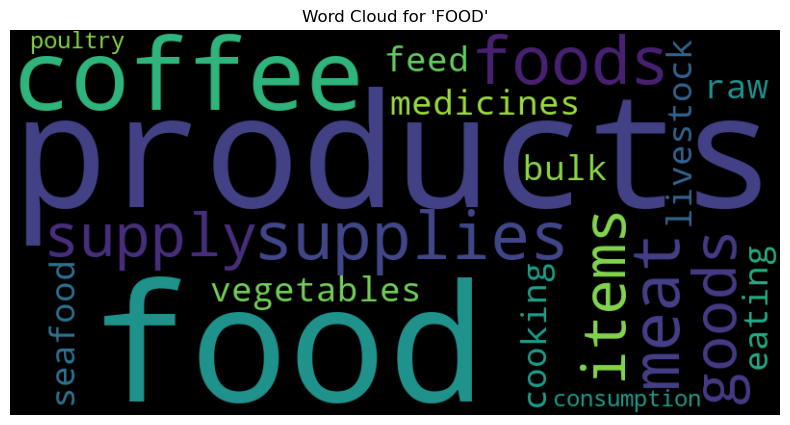

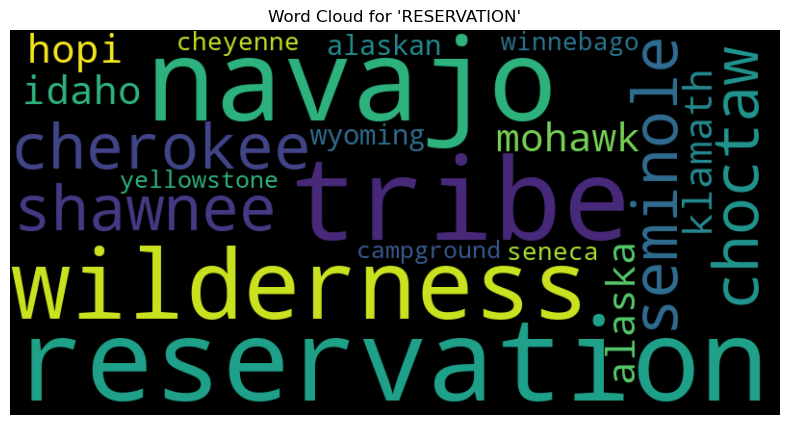

In [31]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def generate_word_cloud(bow_model, title):
    # Extract word-frequency pairs from the BoW model
    word_freq = {bow_model[id]: freq for id, freq in bow_model.dfs.items()}
    
    # Generate the word cloud
    wordcloud = WordCloud(width=800, height=400, background_color="black").generate_from_frequencies(word_freq)
    
    # Display the word cloud using matplotlib
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(title)
    plt.axis("off")
    plt.show()

# Generate word clouds for the BoW models
generate_word_cloud(bow_food, "Word Cloud for 'FOOD'")
generate_word_cloud(bow_reservation, "Word Cloud for 'RESERVATION'")


## Using GPT API to obtain similar words for Receipt file

In [32]:
# Extract text from PDF
def extract_text_from_pdf(pdf_path):
    try:
        doc = fitz.open(pdf_path)
        text = ""
        for page_num in range(len(doc)):
            page = doc.load_page(page_num)
            text += page.get_text()
        return text
    except Exception as e:
        print(f"Error extracting text from PDF: {e}")
        return ""
    
pdf_path = 'Receipt_22Jun2022.pdf' 
text = extract_text_from_pdf(pdf_path)

In [33]:
# Function for GPT API
def find_similar_words_gpt(keyword):
  prompt = [
    {"role": "user", "content": f"{text}\nGive me a list of words from the text above that are similar to the keyword: {keyword}"}
  ]

  response = client.chat.completions.create(
        model="gpt-4o-mini",
        temperature=0,
        messages=prompt
        )
  return response.choices[0].message.content.strip()


In [34]:
# Find similar words for "FOOD" and "RESERVATION"
similar_to_food = find_similar_words_gpt("FOOD")
similar_to_reservation = find_similar_words_gpt("RESERVATION")

print("Words similar to 'FOOD':", similar_to_food)
print("Words similar to 'RESERVATION':", similar_to_reservation)

Words similar to 'FOOD': Here’s a list of words from the text that are related to the keyword "FOOD":

1. Chicken
2. Drumstick
3. Sandwich
4. Poutine
5. Wings
6. Pop
7. Flavor
8. Preparation
9. Add On
10. Total
11. Subtotal
12. Service fee
13. Delivery fee
14. Tax
15. Tip

These words are associated with the food items ordered and the overall transaction.
Words similar to 'RESERVATION': The text provided does not contain any words that are directly similar to the keyword "reservation." However, if you are looking for related terms or concepts, you might consider words like "order," "receipt," or "delivery," as they pertain to the process of securing food or services, similar to how a reservation secures a table or service.


## Repeat the above for Air Canada file

In [35]:
# Load pdf file
pdf_path = 'Air_Canada_Booking_Confirmation.pdf' 
text = extract_text_from_pdf(pdf_path)

In [36]:
# Find similar words for "FOOD" and "RESERVATION"
similar_to_food = find_similar_words_gpt("FOOD")
similar_to_reservation = find_similar_words_gpt("RESERVATION")

print("Words similar to 'FOOD':", similar_to_food)
print("Words similar to 'RESERVATION':", similar_to_reservation)

Words similar to 'FOOD': Here are words from the text that are related to the keyword "FOOD":

1. Meal
2. Special meal requests
3. Food (mentioned in the context of dangerous goods)

These terms are associated with food or meals in the context of air travel.
Words similar to 'RESERVATION': Here are words from the text that are similar to the keyword "reservation":

1. Booking
2. Itinerary
3. Ticket
4. Confirmation
5. Check-in
6. Departure
7. Flight
8. Seat assignment
9. Change
10. Cancellation

These words relate to the process of making, managing, or modifying travel arrangements.


## Describe how Gensim works in finding similar words

**Gensim**

- GloVe (Global Vectors for Word Representation) is a pre-trained word vector model that provides fixed-size word embeddings for capturing semantic similarities between words, here we used glove.6B.50d.txt
- The extracted text from the PDF was tokenized and cleaned (removing punctuation, converting to lowercase, etc.) to prepare it for analysis.
- For each target word (e.g., "FOOD" and "RESERVATION"), we computed the cosine similarity between the word's vector and every other word's vector in the GloVe model.
- The identified similar words were stored in separate Bag of Words (BoW) models using Gensim's Dictionary.

**GPT API**

- Unlike Gensim, which relies on pre-trained static embeddings, the GPT API generates context-aware embeddings and can dynamically understand and generate text based on a provided prompt.
- A prompt was constructed to ask the GPT model to identify words similar to a specific keyword (e.g., "FOOD" and "RESERVATION") within the context of the extracted text.
- The GPT model uses deep learning to understand the context in which words are used, allowing it to provide more nuanced and contextually relevant similar words.
- Unlike static word embeddings (e.g. GloVe), GPT dynamically generates text and can adapt to various contexts, making it highly versatile.

**Summary**

- Gensim: Used pre-trained GloVe embeddings to find semantically similar words based on cosine similarity, followed by visualization with word clouds. This method is highly efficient for tasks involving large, pre-trained models and works well for domain-specific vocabulary.
- GPT API: Leveraged the power of modern language models to dynamically understand context and identify similar words. This method provides a more flexible and context-aware approach, making it useful for complex language tasks where understanding subtle nuances is important.